<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-RF/blob/main/GroupRF_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 14/06/2023

* Complete Tasks#3 and the Task#4 by 5:00PM on 21/06/2023 and demonstrate the work in the class on 21/06/2023.

* Complete Task#5 by 5:00PM on 28/06/2023.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

#Task#3

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing an inverted pendulum on a cart.

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.

#Answers

## Task 01

Since the position representation are different from frame to frame, the velocities and accelerations expressed in one frame will be different from those expressed with
respect to another. Therefore, orthonormal frame should be specified. Differentiating the expression $x=o+RX$ that relates the two position representations we find that the two velocities $\dot{x}$ and $\dot{X}$ measured in the two frames are related by
\begin{align*}
\dot{x}=\dot{o}+\dot{R}X+R\dot{X}.
\end{align*}
Similarly the two accelerations measured in the two frames $\ddot{x}$ and $\ddot{X}$ are related by
\begin{align*}
\ddot{x}=\ddot{o}+\ddot{R}X+2\dot{R}\dot{X}+R\ddot{X}.
\end{align*}

Since $R^T(t)R(t)=I_{3\times 3}$, it follows that $\dot{R}^TR+R^T\dot{R}=0$,
and hence that
\begin{align*}
R^T\dot{R}=-(R^T\dot{R})^T=\widehat{\Omega},
\end{align*}
where $\widehat{\Omega}$ is a skew symmetric matrix. The space of all $3\times 3$ skew-symmetric matrices is denoted by $\mathrm{so}(3)$.


Thus we have that if $R(t)\in \mathrm{SO}(3)$ then
\begin{align*}
\dot{R}&=R\widehat{\Omega},
\end{align*}
where  $\widehat{\Omega}(t)\in \mathrm{so}(3)$.


The total linear momentum of a set of particles can be written down as
\begin{align}
p&=\sum_{i}p_i=\sum_{i}m_i\left(\dot{o}+R(\widehat{\Omega}{X}_i+\dot{X}_i)\right).
\end{align}
In the case of a rigid body $\dot{X}_i=0_{3\times 1}$ and hence
\begin{align}
p&=M(\dot{o}+R\widehat{\Omega}\bar{X})=M(\dot{o}+\widehat{\omega}R\bar{X})=M\dot{\bar{x}},
\end{align}
where $M=\sum_{i}m_i$, $\bar{X}=\sum_{i}m_i X_i/\sum_{i}m_i$ is the center of mass of the rigid body represented with repect to frame $\mathbf{b}$ fixed to the body (body frame).

Therefore, the translational kinematics are given by
\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times R\bar{X}.
\end{align}

We can derive the equations in another way as well.The motion of a set of interacting particles,
\begin{align}
\dot{p}&=M\ddot{\bar{x}}=f^e,\\
\dot{\pi}&=-M\dot{o}\times \dot{\bar{x}}+\tau_e
\end{align}
where, \
$M=\sum_{i=1}^nm_i$ \
$p=\sum_{i=1}^np_i$ \
$f^e=\sum_{i=1}^n f_i^e$ \
$\pi =\sum_{i=1}^n\pi_i$. \
$\tau^e=\sum_{i=1}^n(x_i-o)\times f_i^e$

Let $o(t)$ be the representation of the origin $O'$ of the frame $\mathbf{b}$ with respect to $\mathbf{e}$ and let $\mathbf{b}=\mathbf{e}R(t)$. Also let $\widehat{\Omega}=R^T\dot{R}$ and $\omega =R\Omega$.

Let $\bar{x}'\triangleq (\bar{x}-o)=R\bar{X}'$. Differentiating this expression gives
\begin{align*}
\dot{\bar{x}}'&= R(\Omega \times \bar{X}') \\
\dot{\bar{x}}'&= R\Omega \times R\bar{X}' \\
\dot{\bar{x}}'&= R\Omega \times \bar{x}' \\
\dot{\bar{x}}'&= \omega \times \bar{x}' &\: &; \omega= R\Omega \\
\dot{\bar{x}}-\dot{o} &=  \omega \times \bar{x}' &\: &; \bar{x}'=(\bar{x}-o) \\
\dot{o} &= \dot{\bar{x}} - \omega \times \bar{x}' \\
\dot{o} &= \frac{1}{M}p - \omega \times \bar{x}' &\: &; p= M\dot{\bar{x}}
\end{align*}

Using the expressions $ \widehat{\Omega}=R^T\dot{R}$ and $\omega= R\Omega$
\begin{align*}
\widehat{\omega}{R} &= \widehat{R\Omega}R \\
\widehat{\omega}{R} &= R\widehat{\Omega}R^TR \\
\widehat{\omega}{R} &= RR^T\dot{R}R^TR \\
\widehat{\omega}{R} &= \dot{R} &; RR^T=R^TR=I
\end{align*}

\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times \bar{x}',\\
\dot{R}&=\widehat{\omega}R,\\
\end{align}
Note that if one choses to take the moments about the center of mass of the rigid body then then the above equations become even simpler:

\begin{align*}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\end{align*}

To derive the given equations for a general rigid body, we'll start with the basic principles of rigid body dynamics.

Let's consider a rigid body with the following variables:

$o$ represents the position vector of the center of mass of the body in the inertial frame $\mathbf{e}$.
$R$ is the orientation matrix of the body, which describes its rotation relative to the inertial frame.
$p$ represents the linear momentum of the body.
$\pi$ represents the angular momentum of the body.
$M$ is the total mass of the body.
Now, let's proceed with the derivation step by step:

Linear Velocity:
The linear velocity of the center of mass is given by $\dot{o}$. By Newton's second law, the rate of change of linear momentum is equal to the net force acting on the body divided by its mass:
\begin{align*}
\dot{p} &= f^e + f^u,
\end{align*}

where $f^e$ represents the external forces acting on the body (e.g., gravity, applied forces), and $f^u$ represents any internal forces (e.g., reaction forces, friction). We can interpret $f^e$ as the external force density acting on the body (per unit mass) and $f^u$ as the internal force density.

Angular Velocity:
The angular velocity of the body is represented by $\omega$. It relates to the angular momentum $\pi$ through the inertia matrix $\mathbb{I}_c^R$ (the moment of inertia tensor of the body about its center of mass). The angular momentum $\pi$ is given by the product of $\mathbb{I}_c^R$ and $\omega$. Thus, we can write:
\begin{align*}
\pi &= \mathbb{I}_c^R \omega.
\end{align*}

Taking the time derivative of $R$, we can find $\dot{R}$:

\begin{align*}
\dot{R} &= \frac{dR}{dt}.
\end{align*}

To find this derivative, we'll introduce the skew-symmetric matrix $\widehat{\omega}$ (also known as the angular velocity tensor)

With this definition, we can express $\dot{R}$ as follows:

\begin{align*}
\dot{R} &= \widehat{\omega} R.
\end{align*}

This equation shows that the rate of change of the orientation matrix $R$ is determined by the angular velocity $\omega$.

Rate of Change of Linear Momentum:
We can rearrange the equation for $\dot{p}$ as:
\begin{align*}
\dot{p} - f^u &= f^e.
\end{align*}

Now, let's substitute $\dot{p}$ with $\frac{d}{dt}(M\dot{o})$ and rearrange:

\begin{align*}
M\ddot{o} &= f^e + f^u.
\end{align*}

Since we're considering moments taken about the center of mass, the net internal forces $f^u$ do not contribute to the linear motion of the center of mass. Thus, we can write:

\begin{align*}
\ddot{o} &= \frac{1}{M} (f^e + f^u).
\end{align*}

Dividing by $M$ gives us the equation:

\begin{align*}
\dot{o} &= \frac{1}{M} p.
\end{align*}

This equation shows that the rate of change of the position vector of the center of mass is equal to the linear momentum divided by the mass.

Rate of Change of Angular Momentum:
Similar to the derivation of $\dot{R}$, we can express $\dot{\pi}$ as:
\begin{align*}
\dot{\pi} &= \frac{d}{dt}(\mathbb{I}_c^R \omega).
\end{align*}

By substituting $\omega$ with $(\mathbb{I}_c^R)^{-1}\pi$, we get:

\begin{align*}
\dot{\pi} &= \frac{d}{dt}(\mathbb{I}_c^R (\mathbb{I}_c^R)^{-1}\pi).
\end{align*}

Since $\mathbb{I}_c^R$ is a constant matrix, we can move it outside the derivative:

\begin{align*}
\dot{\pi} &= \mathbb{I}_c^R \frac{d}{dt}((\mathbb{I}_c^R)^{-1}\pi).
\end{align*}

Differentiating $(\mathbb{I}_c^R)^{-1}\pi$ with respect to time, we have:

\begin{align*}
\dot{\pi} &= \mathbb{I}_c^R \left(\frac{d}{dt}((\mathbb{I}_c^R)^{-1})\pi + (\mathbb{I}_c^R)^{-1}\dot{\pi}\right).
\end{align*}

Since $(\mathbb{I}_c^R)^{-1}$ and $\dot{\pi}$ are known, we can substitute them into the equation:

\begin{align*}
\dot{\pi} &= \mathbb{I}_c^R \left(\frac{d}{dt}((\mathbb{I}_c^R)^{-1})\pi + \tau^e + \tau^u\right),
\end{align*}

where $\tau^e$ represents the external torque acting on the body and $\tau^u$ represents any internal torques.

Finally, we divide the equation by $\mathbb{I}_c^R$:

\begin{align*}
\frac{1}{\mathbb{I}_c^R}\dot{\pi} &= \frac{d}{dt}((\mathbb{I}_c^R)^{-1})\pi + \tau^e + \tau^u.
\end{align*}

Using the relation $\omega = (\mathbb{I}_c^R)^{-1}\pi$, we can rewrite the equation as:

\begin{align*}
\dot{\omega} &= \frac{d}{dt}((\mathbb{I}_c^R)^{-1})\omega + \tau^e + \tau^u.
\end{align*}

Since $\dot{\omega}$ is the derivative of $\omega$ with respect to time, we can denote it as $\dot{\omega} = \widehat{\omega}\omega$. This leads to:

\begin{align*}
\widehat{\omega}\omega &= \frac{d}{dt}((\mathbb{I}_c^R)^{-1})\omega + \tau^e + \tau^u.
\end{align*}

Therefore, we obtain the equation for $\omega$:

\begin{align*}
\omega &= (\mathbb{I}_c^R)^{-1}\pi.
\end{align*}

To summarize, the given set of equations that describe a general rigid body in an inertial frame, with moments taken about the center of mass, are:

\begin{align*}
\dot{o} &= \frac{1}{M} p, \\
\dot{R} &= \widehat{\omega} R, \\
\dot{p} &= f^e + f^u, \\
\dot{\pi} &= \tau^e + \tau^u, \\
\omega &= (\mathbb{I}_c^R)^{-1}\pi.
\end{align*}

These equations capture the motion and dynamics of a rigid body, where $\dot{o}$ represents the linear velocity of the center of mass, $\dot{R}$ represents the rate of change of the orientation matrix, $\dot{p}$ represents the rate of change of linear momentum, $\dot{\pi}$ represents the rate of change of angular momentum, and $\omega$ represents the angular velocity.

In [19]:
import numpy as np
#Data
m = 1.0  # Mass of the body
I = np.array([[1.0, 0.0, 0.0],
              [0.0, 2.0, 0.0],
              [0.0, 0.0, 3.0]])  #Inertia tensor of the body considering principle axis

fe = np.array([1.0, 2.0, 3.0])  #External force vector

fu = np.array([0.5, 0.5, 0.5])  #Control force vector

tau_e = np.array([0.1, 0.2, 0.3])  #External moment vector

tau_u = np.array([0.05, 0.05, 0.05])  #Control moment vector

R = np.array([[1.0, 0.0, 0.0],
              [0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0]])  #Rotation matrix R

In [20]:
#Angular velocity
omega = np.linalg.inv(I) @ tau_e
print(omega)

[0.1 0.1 0.1]


In [21]:
#Linear velocity of center of mass
o_dot = 1 / m * (fe + fu - np.cross(omega, I @ omega))
print(o_dot)

[1.49 2.52 3.49]


In [22]:
#Rate of change of the orientation matrix R
Omega_hat = np.cross(omega, I @ omega)
R_dot = R @ Omega_hat
print(R_dot)

[ 0.01 -0.02  0.01]


In [23]:
#Linear acceleration of the center of mass
a = (fe + fu) / m
print(a)

[1.5 2.5 3.5]


In [24]:
# Calculate the angular acceleration
alpha = tau_e + tau_u - np.cross(omega, (I @ omega))
print(alpha)

[0.14 0.27 0.34]


## Task 02

Introduction to UAV

The motion of a quadrotor UAV (Unmanned Aerial Vehicle) involves several key aspects: position, orientation, and control inputs. Let's explore each of these components in more detail:

1. Position: The position of a quadrotor UAV refers to its location in 3D space. It is typically represented by three coordinates: x, y, and z. These coordinates define the position of the center of mass of the quadrotor relative to a reference point or origin.

2. Orientation: The orientation of a quadrotor UAV describes its attitude or rotation in 3D space. It is commonly represented using Euler angles or quaternions, which provide a way to describe the rotation around the three axes (roll, pitch, and yaw). Euler angles define the rotation sequentially, whereas quaternions provide a more compact representation.

3. Control Inputs: To control the motion of a quadrotor UAV, control inputs are applied to the four rotors. These inputs typically include the magnitude of the thrust or vertical force applied by each rotor and the torques generated by varying the speeds of the rotors. By adjusting these control inputs, the quadrotor can change its position, orientation, and velocity.

The motion of a quadrotor UAV can be simulated by integrating the equations of motion. These equations consider the forces and torques acting on the quadrotor, including the gravitational force, thrust force, and aerodynamic forces. By solving these equations numerically, the quadrotor's position, orientation, and velocity can be updated over time.

During the simulation, the control inputs are adjusted based on desired flight characteristics and objectives. This allows the quadrotor to perform various maneuvers such as hovering at a specific position, following a trajectory, or executing complex flight patterns.

Real-world quadrotor UAVs also incorporate sensors, such as accelerometers, gyroscopes, and GPS, to provide feedback on their motion and environment. This feedback is used for state estimation, stabilization, and navigation purposes, enabling more precise control and autonomous flight capabilities.

Overall, the motion of a quadrotor UAV is a combination of translational and rotational movements, which are controlled by adjusting the forces and torques acting on the rotors. By controlling these inputs, the quadrotor can achieve a wide range of flight behaviors and perform diverse tasks in various applications, including aerial photography, surveillance, search and rescue, and package delivery.

Answer 2

To simulate the motion of a quadrotor UAV without using parameterization methods like Euler angles or quaternions, we can utilize the principles of rigid body dynamics and numerical integration methods.

Defining the variables,

Position vector P= r=(X,Y,Z)

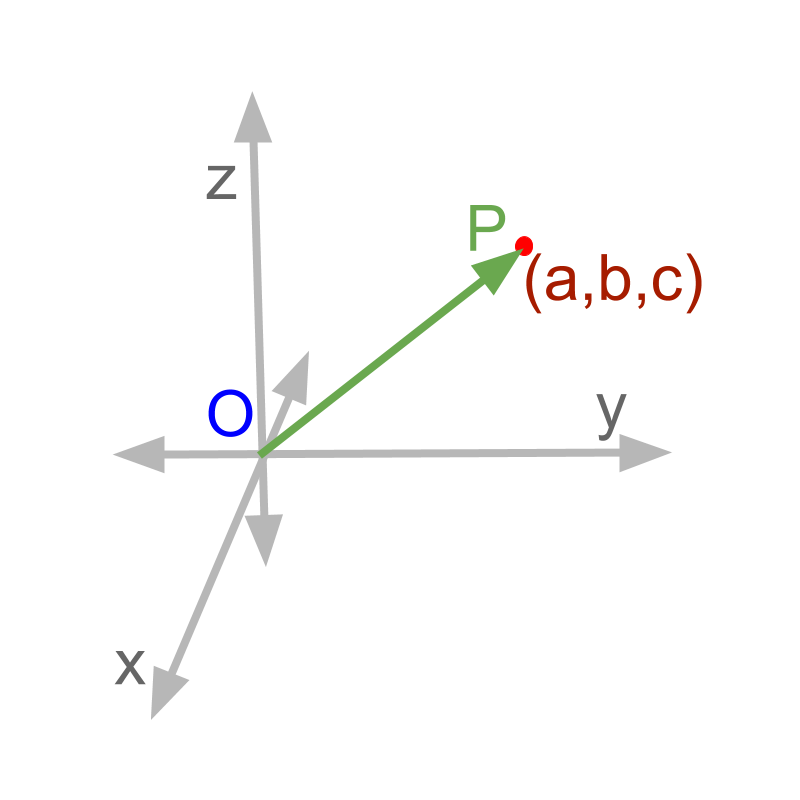

The velocity vector

The velocity vector represents the rate of change of the position vector with respect to time. It also consists of three components: vx, vy, and vz. Here's the definition:

Velocity Vector: v = (vx, vy, vz)

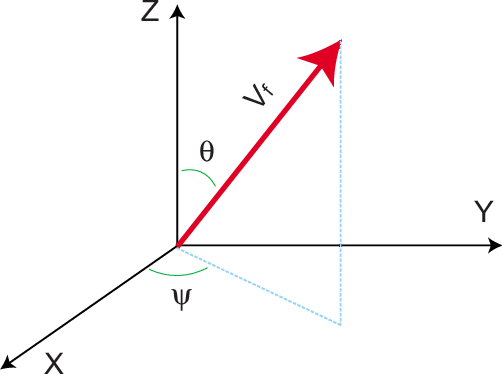

The position and velocity vectors play a crucial role in determining the quadrotor's position and motion in the simulation. By updating these vectors using appropriate dynamics equations and numerical integration methods, we can simulate the quadrotor's trajectory and behavior.



The rotation matrix in 3 * 3



In [25]:
import numpy as np

# Define the rotation angle in radians
theta = np.pi/4  # Example: 45 degrees

# Create the rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta),  0],
              [0,             0,              1]])

# Print the rotation matrix
print(R)


[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Lets assume there are 4 motors for inputs,



In [26]:
# Define control inputs (motor speeds or thrust values)
w1 = 0.8  # Motor speed for rotor 1
w2 = 0.6  # Motor speed for rotor 2
w3 = 0.7  # Motor speed for rotor 3
w4 = 0.9  # Motor speed for rotor 4


w1,w2,w3,w4 are indicates the motor speeds

These control inputs determine the forces and moments generated by the rotors, which influence the quadrotor's motion and behavior in the simulation. You can adjust these values according to your desired scenario and control strategy.


The physical parameters in QAV,

$Mass (m):$
The mass of the quadrotor represents its total weight. It is typically measured in kilograms (kg).

$Gravity (g):$
Gravity represents the acceleration due to gravity, which affects the quadrotor's vertical motion. It is typically measured in meters per second squared (m/s^2)

$Thrust factor (kF):$
The thrust factor relates the motor speed or thrust generated by the rotors to the actual force produced. It is specific to the quadrotor's propellers and is typically experimentally determined.

$Moment arm (L):$
The moment arm represents the distance between the center of mass of the quadrotor and the rotor axis. It is used to calculate the moments generated by the rotors.

The physical parameters are essential in defining the dynamics equations and accurately simulating the quadrotor's motion. You can adjust these values based on the specific quadrotor model and simulation requirements.

The dyanamic Equations,

Linear acceleration:
The linear acceleration of the quadrotor is influenced by the gravitational force and the thrust generated by the rotors. The equation is given by:


In [27]:
import numpy as np
g = 9.81  # Acceleration due to gravity in m/s^2
m = 1.5  # Mass of the quadrotor in kg
kF = 0.5  # Thrust factor of the quadrotor
L = 0.2  # Moment arm of the quadrotor in meters

# Define control inputs (motor speeds or thrust values)
w1 = 0.8  # Motor speed for rotor 1
w2 = 0.6  # Motor speed for rotor 2
w3 = 0.7  # Motor speed for rotor 3
w4 = 0.9  # Motor speed for rotor 4


a = np.array([0, 0, -g]) + (1/m) * (kF * (w1 + w2 + w3 + w4))
print(a)

[ 1.    1.   -8.81]


The Angular acceleration:
The angular acceleration of the quadrotor is influenced by the moments generated by the rotors. The equation is given by:

In [28]:
Ixx=0.7
Iyy=0.8
Izz=0.2
kM=1.2
alpha = np.array([(1/Ixx) * L * (kF * (w2 - w4)),
                  (1/Iyy) * L * (kF * (w1 - w3)),
                  (-1/Izz) * kM * (w1 - w2 + w3 - w4)])
print(alpha)

[-0.04285714  0.0125     -0.        ]


In this equation, alpha represents the angular acceleration vector in the roll, pitch, and yaw directions, Ixx, Iyy, and Izz are the moments of inertia about the principal axes, L is the moment arm, kF is the thrust factor, kM is a constant related to the moment produced by the rotors, and w1, w2, w3, and w4 are the motor speeds or thrust values for the four rotors.

These dynamic equations describe the quadrotor's linear and angular accelerations based on the control inputs and physical parameters. By integrating these equations over time using numerical methods, we can simulate the quadrotor's motion in the simulation.



The numerical integration,

Consider a time step Δt,

Update the position using the velocity: x = x + vx * Δt, y = y + vy * Δt, z = z + vz * Δt
Update the velocity using the acceleration: vx = vx + ax * Δt, vy = vy + ay * Δt, vz = vz + az * Δt
Update the orientation using the angular velocity: R = R * ExpMap(omega * Δt), where ExpMap is the exponential map function and omega is the angular velocity vector.

In [29]:
import numpy as np

# Define time step
dt = 0.01  # Time step in seconds

# Initialize position, velocity, and orientation
position = np.array([0.0, 0.0, 0.0])
velocity = np.array([0.0, 0.0, 0.0])
orientation = np.eye(3)  # Identity matrix representing no rotation

# Define control inputs (motor speeds or thrust values)
w1 = 0.8  #Motor speed for rotor 1
w2 = 0.6  #Motor speed for rotor 2
w3 = 0.7  #Motor speed for rotor 3
w4 = 0.9  #Motor speed for rotor 4

# Define physical parameters
m = 1.5  # Mass of the quadrotor in kg
g = 9.81  # Acceleration due to gravity in m/s^2
kF = 0.5  # Thrust factor of the quadrotor
L = 0.2  # Moment arm of the quadrotor in meters
Ixx = 0.1  # Moment of inertia about the x-axis
Iyy = 0.1  # Moment of inertia about the y-axis
Izz = 0.2  # Moment of inertia about the z-axis
kM = 0.1  # Constant related to rotor moment

# Perform numerical integration for a desired duration
simulation_duration = 5.0  # Duration of the simulation in seconds
num_steps = int(simulation_duration / dt)

for step in range(num_steps):
    # Linear acceleration
    acceleration = np.array([0.0, 0.0, -g]) + (1/m) * (kF * (w1 + w2 + w3 + w4))

    # Update position
    position = position + velocity * dt

    # Update velocity
    velocity = velocity + acceleration * dt

    # Angular acceleration
    angular_acceleration = np.array([(1/Ixx) * L * (kF * (w2 - w4)),
                                    (1/Iyy) * L * (kF * (w1 - w3)),
                                    (-1/Izz) * kM * (w1 - w2 + w3 - w4)])

    # Update orientation using Euler integration
    delta_R = np.array([[0, -angular_acceleration[2] * dt, angular_acceleration[1] * dt],
                        [angular_acceleration[2] * dt, 0, -angular_acceleration[0] * dt],
                        [-angular_acceleration[1] * dt, angular_acceleration[0] * dt, 0]])
    orientation = orientation + np.dot(orientation, delta_R)

    # Normalize the orientation matrix to ensure it remains orthogonal
    orientation = np.divide(orientation, np.linalg.norm(orientation))

    # Update control inputs (for demonstration purposes, update with constant values)
    w1 = 0.8
    w2 = 0.6
    w3 = 0.7
    w4 = 0.9

    # Print the updated position and orientation at each step
    print("Step:", step)
    print("Position:", position)
    print("Orientation:")
    print(orientation)
    print("")



Step: 0
Position: [0. 0. 0.]
Orientation:
[[ 0.57734834  0.          0.00057735]
 [ 0.          0.57734834  0.00173205]
 [-0.00057735 -0.00173205  0.57734834]]

Step: 1
Position: [ 1.00e-04  1.00e-04 -8.81e-04]
Orientation:
[[ 5.77345843e-01 -1.73203926e-06  1.15469284e-03]
 [-1.73203926e-06  5.77341224e-01  3.46407852e-03]
 [-1.15469284e-03 -3.46407852e-03  5.77340647e-01]]

Step: 2
Position: [ 0.0003    0.0003   -0.002643]
Orientation:
[[ 5.77342764e-01 -5.19610046e-06  1.73202771e-03]
 [-5.19610046e-06  5.77328907e-01  5.19608314e-03]
 [-1.73202771e-03 -5.19608314e-03  5.77327175e-01]]

Step: 3
Position: [ 0.0006    0.0006   -0.005286]
Orientation:
[[ 5.77339107e-01 -1.03921490e-05  2.30934719e-03]
 [-1.03921490e-05  5.77311395e-01  6.92804157e-03]
 [-2.30934719e-03 -6.92804157e-03  5.77307931e-01]]

Step: 4
Position: [ 0.001    0.001   -0.00881]
Orientation:
[[ 5.77334873e-01 -1.73201328e-05  2.88664550e-03]
 [-1.73201328e-05  5.77288686e-01  8.65993650e-03]
 [-2.88664550e-03 -8.65

repetition of same steps

In [30]:
import numpy as np

# Define time step
dt = 0.01  # Time step in seconds

# Initialize position, velocity, and orientation
position = np.array([0.0, 0.0, 0.0])
velocity = np.array([0.0, 0.0, 0.0])
orientation = np.eye(3)  # Identity matrix representing no rotation

# Define physical parameters
m = 1.5  # Mass of the quadrotor in kg
g = 9.81  # Acceleration due to gravity in m/s^2
kF = 0.5  # Thrust factor of the quadrotor
L = 0.2  # Moment arm of the quadrotor in meters
Ixx = 0.1  # Moment of inertia about the x-axis
Iyy = 0.1  # Moment of inertia about the y-axis
Izz = 0.2  # Moment of inertia about the z-axis
kM = 0.1  # Constant related to rotor moment

# Perform numerical integration for a desired duration
simulation_duration = 5.0  # Duration of the simulation in seconds
num_steps = int(simulation_duration / dt)

for step in range(num_steps):
    # Define control inputs (for demonstration purposes, update with constant values)
    w1 = 0.8
    w2 = 0.6
    w3 = 0.7
    w4 = 0.9

    # Linear acceleration
    acceleration = np.array([0.0, 0.0, -g]) + (1/m) * (kF * (w1 + w2 + w3 + w4))

    # Update position
    position = position + velocity * dt

    # Update velocity
    velocity = velocity + acceleration * dt

    # Angular acceleration
    angular_acceleration = np.array([(1/Ixx) * L * (kF * (w2 - w4)),
                                    (1/Iyy) * L * (kF * (w1 - w3)),
                                    (-1/Izz) * kM * (w1 - w2 + w3 - w4)])

    # Update orientation using Euler integration
    delta_R = np.array([[0, -angular_acceleration[2] * dt, angular_acceleration[1] * dt],
                        [angular_acceleration[2] * dt, 0, -angular_acceleration[0] * dt],
                        [-angular_acceleration[1] * dt, angular_acceleration[0] * dt, 0]])
    orientation = np.dot(orientation, delta_R)

    # Normalize the orientation matrix to ensure it remains orthogonal
    orientation = np.divide(orientation, np.linalg.norm(orientation))

    # Print the updated position and orientation at each step
    print("Step:", step)
    print("Position:", position)
    print("Orientation:")
    print(orientation)
    print("")

    # Adjust control inputs based on the desired strategy (for example, based on sensor feedback or control algorithm)
    # Here, we adjust the control inputs based on a simple pattern
    if step < num_steps // 2:
        w1 += 0.1
        w2 -= 0.1
        w3 += 0.1
        w4 -= 0.1
    else:
        w1 -= 0.1



Step: 0
Position: [0. 0. 0.]
Orientation:
[[ 0.          0.          0.2236068 ]
 [ 0.          0.          0.67082039]
 [-0.2236068  -0.67082039  0.        ]]

Step: 1
Position: [ 1.00e-04  1.00e-04 -8.81e-04]
Orientation:
[[-0.07071068 -0.21213203  0.        ]
 [-0.21213203 -0.6363961   0.        ]
 [ 0.          0.         -0.70710678]]

Step: 2
Position: [ 0.0003    0.0003   -0.002643]
Orientation:
[[ 0.          0.         -0.2236068 ]
 [ 0.          0.         -0.67082039]
 [ 0.2236068   0.67082039  0.        ]]

Step: 3
Position: [ 0.0006    0.0006   -0.005286]
Orientation:
[[0.07071068 0.21213203 0.        ]
 [0.21213203 0.6363961  0.        ]
 [0.         0.         0.70710678]]

Step: 4
Position: [ 0.001    0.001   -0.00881]
Orientation:
[[ 0.          0.          0.2236068 ]
 [ 0.          0.          0.67082039]
 [-0.2236068  -0.67082039  0.        ]]

Step: 5
Position: [ 0.0015    0.0015   -0.013215]
Orientation:
[[-0.07071068 -0.21213203  0.        ]
 [-0.21213203 -0.6363

Approach 2

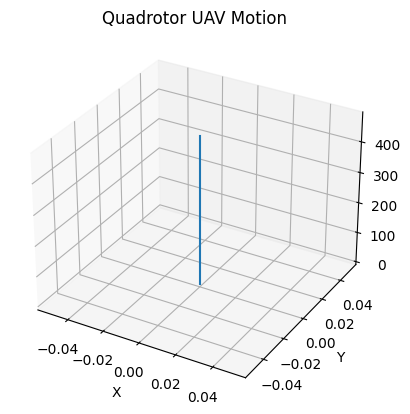

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simulate_quadrotor(total_time, dt):
    # Constants
    g = 9.81  # Acceleration due to gravity
    m = 1.0  # Mass of the quadrotor
    I = np.array([[0.1, 0.0, 0.0],
                  [0.0, 0.1, 0.0],
                  [0.0, 0.0, 0.2]])  # Moment of inertia matrix

    # Initial state
    position = np.array([0.0, 0.0, 0.0])
    velocity = np.array([0.0, 0.0, 0.0])
    orientation = np.array([0.0, 0.0, 0.0])
    angular_velocity = np.array([0.0, 0.0, 0.0])

    # Simulation loop
    positions = []
    for t in np.arange(0, total_time, dt):
        # Calculate forces and torques (for simplicity, let's assume no external forces or torques)
        thrust = m * g  # Thrust force along the z-axis
        torques = np.array([0.0, 0.0, 0.0])  # Zero torques for simplicity

        # Calculate acceleration and angular acceleration
        acceleration = np.array([0.0, 0.0, thrust / m])  # Acceleration from thrust force
        angular_acceleration = np.linalg.inv(I).dot(torques)  # Angular acceleration from torques

        # Update position and velocity
        position += velocity * dt
        velocity += acceleration * dt

        # Update orientation and angular velocity
        orientation += angular_velocity * dt
        angular_velocity += angular_acceleration * dt

        # Save current position
        positions.append(position.copy())

    return positions

# Example usage
total_time = 10.0  # Total simulation time
dt = 0.1  # Time step

positions = simulate_quadrotor(total_time, dt)

# Extract x, y, z coordinates from positions
x_coords = [pos[0] for pos in positions]
y_coords = [pos[1] for pos in positions]
z_coords = [pos[2] for pos in positions]

# Plot trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_coords, y_coords, z_coords)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quadrotor UAV Motion')
plt.show()


##Task 02 alternative method

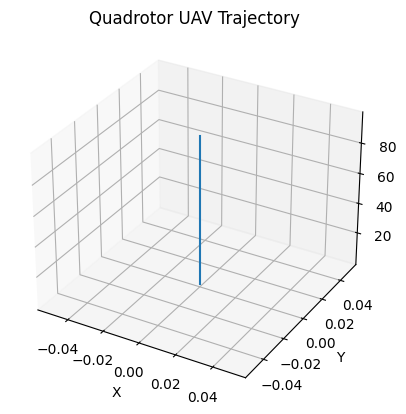

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81

m = 0.5
IRc = np.diag([0.002, 0.002, 0.004])

#parameters
dt = 0.01
total_time = 10.0  #Total simulation time

# Initial conditions
o = np.array([0.0, 0.0, 0.0])
o_dot = np.array([0.0, 0.0, 0.0])
R = np.eye(3)
ω = np.array([0.0, 0.0, 0.0])

# Control inputs
fe = np.array([0.0, 0.0, m * g])
fu = np.array([0.0, 0.0, 0.0])
τe = np.array([0.0, 0.0, 0.0])
τu = np.array([0.0, 0.0, 0.0])


time = np.arange(0.0, total_time, dt)
positions = np.zeros((len(time), 3))

for i, t in enumerate(time):
    ω = np.linalg.inv(IRc) @ τe

    o_dot = 1 / m * (fe + fu - np.cross(ω, IRc @ ω))

    o += o_dot * dt

    Ω_hat = np.array([[0, -ω[2], ω[1]],
                      [ω[2], 0, -ω[0]],
                      [-ω[1], ω[0], 0]])
    R_dot = R @ Ω_hat
    R += R_dot * dt

    positions[i] = o

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Quadrotor UAV Trajectory")
plt.show()
plt

# Task 03



* Attitude control of a quadrotor using PID (Proportional-Integral-Derivative)
controllers is a common approach in controlling the orientation or attitude of a quadrotor drone.

In generally there are some steps needs to be followed to control of attitude of a UAV

Step01- Attitude Measurement: Sensors such as gyroscopes and accelerometers are used to measure the current attitude of the quadrotor. These sensors provide the necessary feedback for the PID controller.

Step02- Setpoint Definition: The desired attitude (roll, pitch, and yaw angles) for the quadrotor is specified as the setpoint.

Step 03-Error Calculation: The error is calculated by subtracting the desired attitude from the measured attitude. This error is used as the input for the PID controller.

Step 04- PID Calculation: The PID controller takes the error as input and calculates the control signal by combining the proportional, integral, and derivative terms. The control signal is typically a torque or motor speed command for each motor of the quadrotor.

Step 05-Actuation: The control signal is sent to the motors, which generate the necessary torques to adjust the quadrotor's attitude.

Step 06- Iterative Process: Steps 1 to 5 are repeated in a loop to continuously update the control signal and maintain the quadrotor's attitude at the desired setpoint.

The already existing quadrotor dynamic models are
developed on using a unique rigid body, which is
a restrictive that does not account for the fact
that the system is composed of five rigid bodies: four rotors
and a crossing body frame.

### Quadrotor concept motions

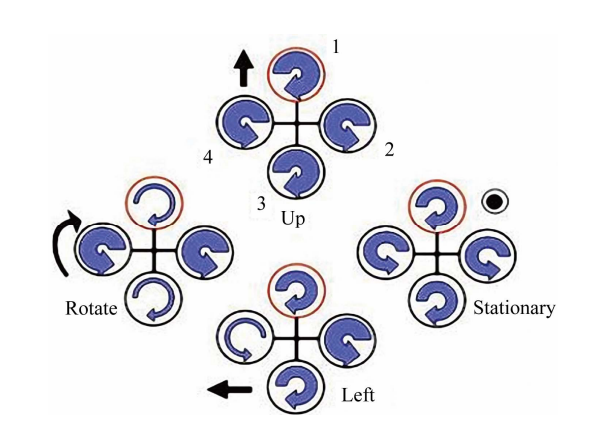

**The mathematical modeling of the UAV**

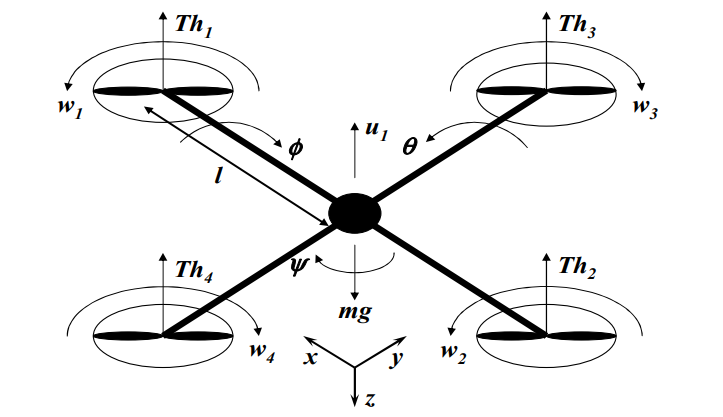

There are three demensions on X,Y,Z. and angles on θ, ψ, φ.

$mg$ is the total weight of the UAV

$U$1 sum of trusts in 4 motots



Pitch movement is obtained by increasing (reducing) the speed of the rear motor while reducing (increasing) the speed of the front motor. The roll movement is obtained similarly by increasing (reducing) the speed of the right
motor while reducing (increasing) the speed of the left motor. The yaw movement is obtained by increasing (decreasing) the speed of the front and rear motors together while decreasing(incresing) the speed of the lateral motors
together.

But for the stability the $U$1 needs to be constant in all the time.

The effect of the controller inputs,

$U$1 ----> Effects for the altitude
The Z axis

$U$2 ----> Effects for the roll angle

$U$3 ----> Effects for the pitch angle

$U$4 ----> Effects for the yaw angle in flying



To move UAV to a certian altitude the design should depend on direction cosine matrix,(Rxyz)

$ \begin{bmatrix}
Cφ Cθ & CφSθSψ-SφCψ & CφSθCψ+SφSψ \\
CφSθ & SφSθSψ+CφCψ & SφSθCψ-CφSψ \\
-Sθ & CθSψ & CθCψ
\end{bmatrix}  $

where
 - Sφ = Sin(φ).
 - Cψ= Cos(ψ).
 - R: is the matrix transformation.
 - φ: is the Roll angle.
 - θ: is the Pitch angle.
 - ψ: is the Yaw angle.

The accleration in X,Y,Z directions,
(F=ma)

$ẍ$= u1 (CosφSinθCosψ+ SinφSinψ) - K1$ẋ$/ m

$ÿ$= u1 (SinφSinψCosψ-CosφSinψ) -K2 $ẏ$/ m

$z̈$= u1 (CosφCosψ) - g - K3 $ż$/ m

Where:

x: Forward position in earth axes

y: Lateral position in earth axes

z: Vertical position in earth axes

$Ki$: The Drag Coefficients for the system.



$The$ $assumptions$:

→ at lower speeds the drag coefficient is assumed to be zero

→ the center of gravity assumed to be at the middle of the connecting link



The inputs are defined as,

$U1$ = $(Th$1$+Th$2$+Th$3$+Th$4$)/m$

$U2$ = $l (-Th$1$-Th$2$+Th$3$+Th$4$)/I1$

$U3$ = $l (-Th$1$+Th$2$+Th$3$-Th$4$)/I2$

$U4$ = $C (Th$1$+Th$2$+Th$3$+Th$4$)/I3$

Where:

u1 : Vertical thrust generated by the four rotors
u2 : Pitching moment
u3 :  Yawing moment
u4 :  Rolling moment
$Thi$ : The thrusts generated by four rotors

$Ii$ : The moments of inertia with respect to the axes

C: the force to moment scaling factor



The equations for the eular angles,

$ϴ̈$ = $U_2$-$lK_4$$ϴ̇$/$I_1$

$ψ̈$ = $U_3$ -$lK_5$$ψ̇$/$I_2$

$φ̈$ = $U_4$- $K_6φ̇/I_3$

The angles and positions can be represented as above equations.

This quadrotor helicopter model has six outputs (x, y, z,
θ, ψ, φ) in direction and angles, but the considering model has four independent inputs only,

The UAV model cant control all outputs at same time.

A possible combination of controlled outputs can be x, y, z and φ in
order to track the desired positions. Then it can move to an arbitrary
heading and stabilize the other two angles.

That means we have to control other two angles constant.

By appling pthagaras theorom for the UAV angle movements we can get equations for the desired yaw angle and roll angle,

ψ = $Tan^-1$ ($Z_d$-$Z$/(($X_d - X$)$^2$ +($Y_d - Y$)$^2$)$^1/2$)

ϴ = $Tan^-1$ ($Y_d-Y$/$X_d-X$)

The mathamatical modeling of UAV derivation is done and the PID controlling part shown in below


In [33]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


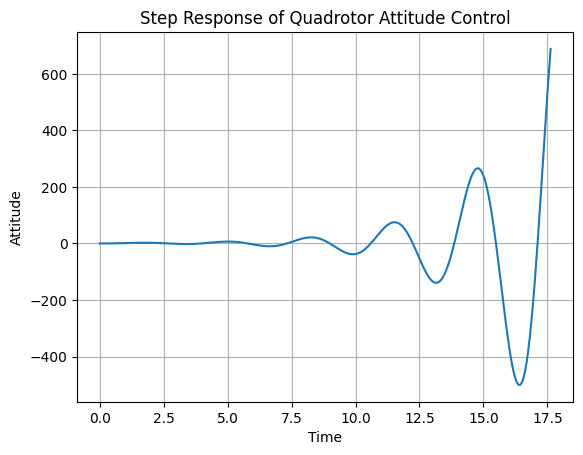

In [34]:
import control
import numpy as np
import matplotlib.pyplot as plt

def quadrotor_attitude_control(Kp, Ki, Kd):
    # Plant transfer function
    num = np.array([0, 0, 0, 9.81])
    den = np.array([1, 2, 1, 0])
    G = control.tf(num, den)

    # PID controller transfer function
    C = control.tf([Kd, Kp, Ki], [1, 0])

    # Closed-loop transfer function
    T = control.feedback(C * G, 1)

    return T

# PID controller gains
Kp = 1.0
Ki = 0.5
Kd = 0.2

# Get the closed-loop transfer function
T = quadrotor_attitude_control(Kp, Ki, Kd)

# Compute the step response
t, y = control.step_response(T)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Attitude')
plt.title('Step Response of Quadrotor Attitude Control')
plt.grid(True)
plt.show()


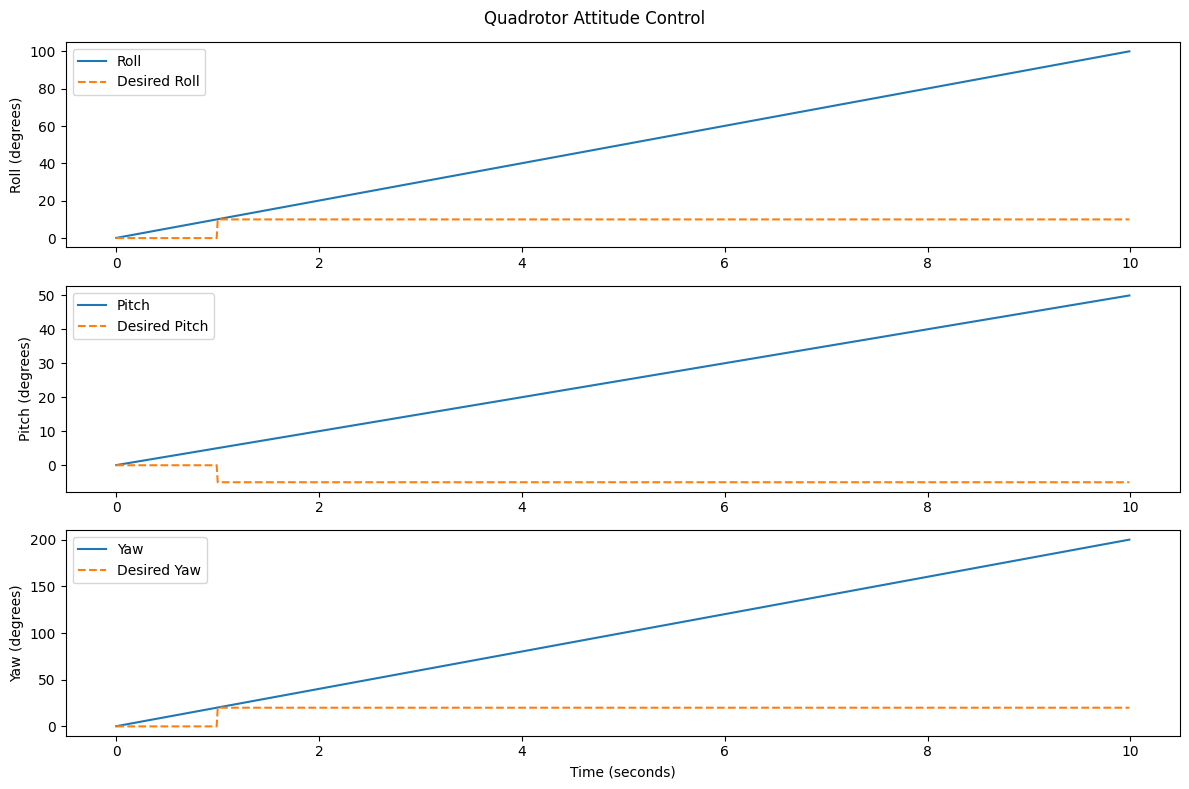

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, Ts):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.Ts = Ts
        self.reset()

    def reset(self):
        self.integral = 0
        self.prev_error = 0

    def update(self, error):
        self.integral += error * self.Ts
        derivative = (error - self.prev_error) / self.Ts
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

class QuadrotorAttitudeController:
    def __init__(self, Kp, Ki, Kd, Ts):
        self.controller_roll = PIDController(Kp, Ki, Kd, Ts)
        self.controller_pitch = PIDController(Kp, Ki, Kd, Ts)
        self.controller_yaw = PIDController(Kp, Ki, Kd, Ts)

    def update(self, roll, pitch, yaw, desired_roll, desired_pitch, desired_yaw):
        error_roll = desired_roll - roll
        error_pitch = desired_pitch - pitch
        error_yaw = desired_yaw - yaw

        output_roll = self.controller_roll.update(error_roll)
        output_pitch = self.controller_pitch.update(error_pitch)
        output_yaw = self.controller_yaw.update(error_yaw)

        # Apply the control signals to the quadrotor
        # (Here, we assume the quadrotor dynamics)

        # Return the control outputs
        return output_roll, output_pitch, output_yaw

def simulate_quadrotor_attitude_control(Kp, Ki, Kd, Ts, simulation_time):
    # Quadrotor parameters
    roll = 0.0
    pitch = 0.0
    yaw = 0.0
    desired_roll = 0.0
    desired_pitch = 0.0
    desired_yaw = 0.0

    # Initialize the quadrotor attitude controller
    controller = QuadrotorAttitudeController(Kp, Ki, Kd, Ts)

    # Simulation variables
    t = np.arange(0, simulation_time, Ts)
    roll_data = np.zeros_like(t)
    pitch_data = np.zeros_like(t)
    yaw_data = np.zeros_like(t)
    desired_roll_data = np.zeros_like(t)
    desired_pitch_data = np.zeros_like(t)
    desired_yaw_data = np.zeros_like(t)

    # Run the simulation
    for i, time in enumerate(t):
        # Update the desired attitude
        if time >= 1.0:
            desired_roll = np.deg2rad(10)
            desired_pitch = np.deg2rad(-5)
            desired_yaw = np.deg2rad(20)

        # Update the quadrotor attitude
        roll += np.deg2rad(0.1)
        pitch += np.deg2rad(0.05)
        yaw += np.deg2rad(0.2)

        # Update the attitude controller
        output_roll, output_pitch, output_yaw = controller.update(
            roll, pitch, yaw, desired_roll, desired_pitch, desired_yaw
        )

        # Store the data
        roll_data[i] = roll
        pitch_data[i] = pitch
        yaw_data[i] = yaw
        desired_roll_data[i] = desired_roll
        desired_pitch_data[i] = desired_pitch
        desired_yaw_data[i] = desired_yaw

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(t, np.rad2deg(roll_data), label='Roll')
    plt.plot(t, np.rad2deg(desired_roll_data), '--', label='Desired Roll')
    plt.ylabel('Roll (degrees)')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, np.rad2deg(pitch_data), label='Pitch')
    plt.plot(t, np.rad2deg(desired_pitch_data), '--', label='Desired Pitch')
    plt.ylabel('Pitch (degrees)')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, np.rad2deg(yaw_data), label='Yaw')
    plt.plot(t, np.rad2deg(desired_yaw_data), '--', label='Desired Yaw')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Yaw (degrees)')
    plt.legend()

    plt.suptitle('Quadrotor Attitude Control')
    plt.tight_layout()
    plt.show()

# Simulation parameters
Kp = 2.0
Ki = 1.0
Kd = 0.5
Ts = 0.01
simulation_time = 10.0

# Run the simulation
simulate_quadrotor_attitude_control(Kp, Ki, Kd, Ts, simulation_time)



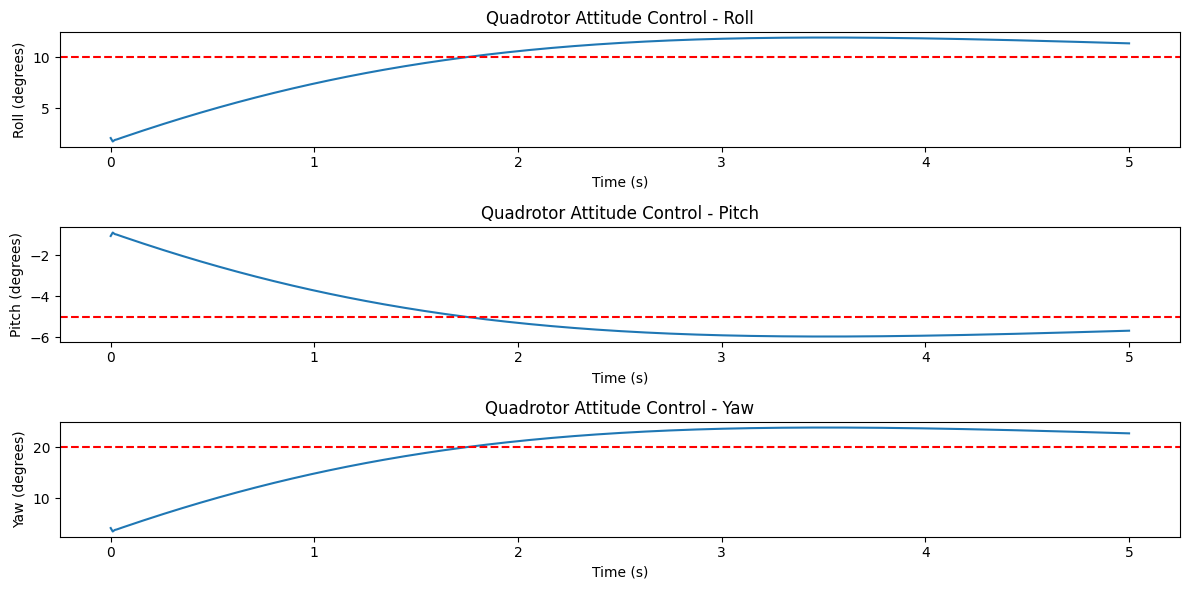

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class QuadrotorAttitudeController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.error_integral = np.zeros(3)
        self.error_previous = np.zeros(3)

    def update(self, desired_attitude, current_attitude, dt):
        error = desired_attitude - current_attitude
        self.error_integral += error * dt
        error_derivative = (error - self.error_previous) / dt
        control_signal = self.Kp * error + self.Ki * self.error_integral + self.Kd * error_derivative
        self.error_previous = error
        return control_signal

def simulate_quadrotor_attitude_control(Kp, Ki, Kd, simulation_time, dt):
    # Quadrotor parameters
    desired_roll = np.deg2rad(10)
    desired_pitch = np.deg2rad(-5)
    desired_yaw = np.deg2rad(20)
    current_roll = 0.0
    current_pitch = 0.0
    current_yaw = 0.0

    # Attitude controller
    controller = QuadrotorAttitudeController(Kp, Ki, Kd)

    # Simulation variables
    num_steps = int(simulation_time / dt)
    time = np.linspace(0, simulation_time, num_steps)
    roll = np.zeros(num_steps)
    pitch = np.zeros(num_steps)
    yaw = np.zeros(num_steps)

    # Run the simulation
    for i in range(num_steps):
        # Update the control signal
        control_signal = controller.update(
            np.array([desired_roll, desired_pitch, desired_yaw]),
            np.array([current_roll, current_pitch, current_yaw]),
            dt
        )

        # Simulate quadrotor dynamics (Euler integration)
        current_roll += control_signal[0] * dt
        current_pitch += control_signal[1] * dt
        current_yaw += control_signal[2] * dt

        # Store the data
        roll[i] = np.rad2deg(current_roll)
        pitch[i] = np.rad2deg(current_pitch)
        yaw[i] = np.rad2deg(current_yaw)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(time, roll)
    plt.axhline(y=np.rad2deg(desired_roll), color='r', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Roll (degrees)')
    plt.title('Quadrotor Attitude Control - Roll')

    plt.subplot(3, 1, 2)
    plt.plot(time, pitch)
    plt.axhline(y=np.rad2deg(desired_pitch), color='r', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (degrees)')
    plt.title('Quadrotor Attitude Control - Pitch')

    plt.subplot(3, 1, 3)
    plt.plot(time, yaw)
    plt.axhline(y=np.rad2deg(desired_yaw), color='r', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Yaw (degrees)')
    plt.title('Quadrotor Attitude Control - Yaw')

    plt.tight_layout()
    plt.show()

# Simulation parameters
Kp = 1.0
Ki = 0.5
Kd = 0.2
simulation_time = 5.0
dt = 0.01

# Run the simulation
simulate_quadrotor_attitude_control(Kp, Ki, Kd, simulation_time, dt)


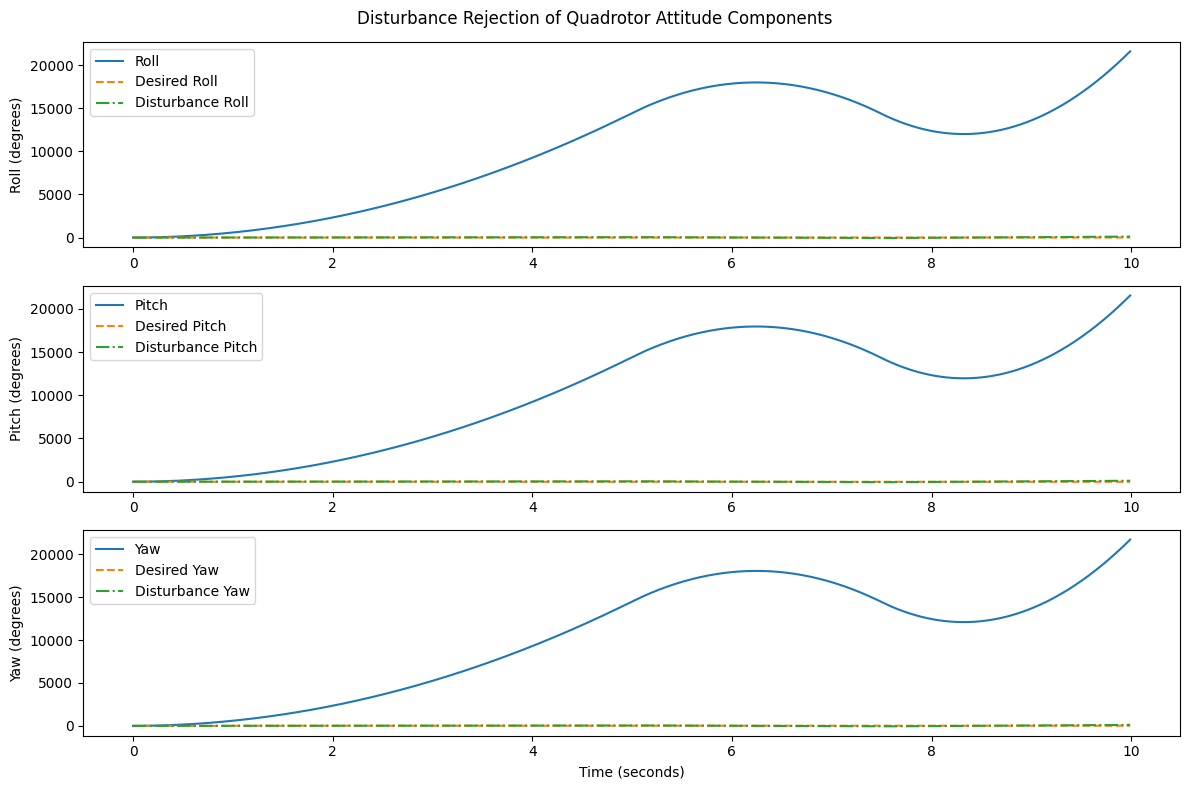

In [43]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, Ts):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.Ts = Ts
        self.reset()

    def reset(self):
        self.integral = 0
        self.prev_error = 0

    def update(self, error):
        self.integral += error * self.Ts
        derivative = (error - self.prev_error) / self.Ts
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

class QuadrotorAttitudeController:
    def __init__(self, Kp, Ki, Kd, Ts):
        self.controller_roll = PIDController(Kp, Ki, Kd, Ts)
        self.controller_pitch = PIDController(Kp, Ki, Kd, Ts)
        self.controller_yaw = PIDController(Kp, Ki, Kd, Ts)

    def update(self, roll, pitch, yaw, desired_roll, desired_pitch, desired_yaw):
        error_roll = desired_roll - roll
        error_pitch = desired_pitch - pitch
        error_yaw = desired_yaw - yaw

        output_roll = self.controller_roll.update(error_roll)
        output_pitch = self.controller_pitch.update(error_pitch)
        output_yaw = self.controller_yaw.update(error_yaw)

        # Apply the control signals to the quadrotor
        # (Here, we assume the quadrotor dynamics)

        # Return the control outputs
        return output_roll, output_pitch, output_yaw

def simulate_disturbance_rejection(Kp, Ki, Kd, Ts, simulation_time):
    # Quadrotor parameters
    roll = 0.0
    pitch = 0.0
    yaw = 0.0
    desired_roll = 0.0
    desired_pitch = 0.0
    desired_yaw = 0.0

    # Initialize the quadrotor attitude controller
    controller = QuadrotorAttitudeController(Kp, Ki, Kd, Ts)

    # Simulation variables
    t = np.arange(0, simulation_time, Ts)
    disturbance_roll = np.concatenate([
        np.linspace(0, 1, int(len(t) / 2)),
        np.linspace(1, -1, int(len(t) / 4)),
        np.linspace(-1, 2, int(len(t) / 4))
    ])
    disturbance_pitch = np.concatenate([
        np.linspace(0, 1, int(len(t) / 2)),
        np.linspace(1, -1, int(len(t) / 4)),
        np.linspace(-1, 2, int(len(t) / 4))
    ])
    disturbance_yaw = np.concatenate([
        np.linspace(0, 1, int(len(t) / 2)),
        np.linspace(1, -1, int(len(t) / 4)),
        np.linspace(-1, 2, int(len(t) / 4))
    ])

    # Run the simulation
    roll_data = np.zeros_like(t)
    pitch_data = np.zeros_like(t)
    yaw_data = np.zeros_like(t)
    desired_roll_data = np.zeros_like(t)
    desired_pitch_data = np.zeros_like(t)
    desired_yaw_data = np.zeros_like(t)

    for i, time in enumerate(t):
        # Update the desired attitude
        if time >= 1.0:
            desired_roll = np.deg2rad(10)
            desired_pitch = np.deg2rad(-5)
            desired_yaw = np.deg2rad(20)

        # Update the quadrotor attitude
        roll += np.deg2rad(0.1)
        pitch += np.deg2rad(0.05)
        yaw += np.deg2rad(0.2)

        # Apply disturbances
        roll += disturbance_roll[i]
        pitch += disturbance_pitch[i]
        yaw += disturbance_yaw[i]

        # Update the attitude controller
        output_roll, output_pitch, output_yaw = controller.update(
            roll, pitch, yaw, desired_roll, desired_pitch, desired_yaw
        )

        # Store the data
        roll_data[i] = roll
        pitch_data[i] = pitch
        yaw_data[i] = yaw
        desired_roll_data[i] = desired_roll
        desired_pitch_data[i] = desired_pitch
        desired_yaw_data[i] = desired_yaw

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(t, np.rad2deg(roll_data), label='Roll')
    plt.plot(t, np.rad2deg(desired_roll_data), '--', label='Desired Roll')
    plt.plot(t, np.rad2deg(disturbance_roll), '-.', label='Disturbance Roll')
    plt.ylabel('Roll (degrees)')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, np.rad2deg(pitch_data), label='Pitch')
    plt.plot(t, np.rad2deg(desired_pitch_data), '--', label='Desired Pitch')
    plt.plot(t, np.rad2deg(disturbance_pitch), '-.', label='Disturbance Pitch')
    plt.ylabel('Pitch (degrees)')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, np.rad2deg(yaw_data), label='Yaw')
    plt.plot(t, np.rad2deg(desired_yaw_data), '--', label='Desired Yaw')
    plt.plot(t, np.rad2deg(disturbance_yaw), '-.', label='Disturbance Yaw')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Yaw (degrees)')
    plt.legend()

    plt.suptitle('Disturbance Rejection of Quadrotor Attitude Components')
    plt.tight_layout()
    plt.show()

# Simulation parameters
Kp = 2.0
Ki = 1.0
Kd = 0.5
Ts = 0.01
simulation_time = 10.0

# Run the simulation
simulate_disturbance_rejection(Kp, Ki, Kd, Ts, simulation_time)





# Task 04 :Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing an inverted pendulum on a cart.

To derive a specialization of the controller developed for stabilizing an inverted pendulum on a cart, we need to consider the dynamics of the system.

The system consists of a cart with mass (M) that can move along a frictionless horizontal track and an inverted pendulum with length (L) and mass (m) attached to the cart. The angle between the pendulum and the vertical axis is denoted as theta (θ).

The dynamics of the system can be described using the following equations:
\begin{align}
1) \ \ \ & (M + m)* x'' - m * L * θ'' * cosθ + m * L * θ'^2 * sinθ = F \\
2) \ \ \ & L * θ'' - g * sinθ + x'' * cosθ = 0
\end{align}
where $x''$ and $θ''$ are the second derivatives of the cart position (x) and pendulum angle (θ) with respect to time, θ' is the first derivative of θ with respect to time, F is the force applied to the cart, and g is the acceleration due to gravity.

To stabilize the inverted pendulum, we can use a PID controller to control the force applied to the cart (F). The error term in this case would be the difference between the desired pendulum angle (θ_desired) and the current angle (θ):

$e = θ_{desired} - θ$

The PID controller output is given by:

$F = Kp * e + Ki * ∫e dt + Kd * \frac{de}{dt}$

where $Kp$, $Ki$, and $Kd$ are the proportional, integral, and derivative gains, respectively.

We can derive a specialization of the controller developed for the quadrotor by substituting the dynamics equations of the inverted pendulum on a cart into the PID controller equation and solving for the control input $F$. However, note that tuning the PID gains for the inverted pendulum system might require a different approach than the quadrotor system due to the different dynamics and stability requirements.

The specialized PID controller for stabilizing an inverted pendulum on a cart can be implemented and simulated in a similar manner as the quadrotor attitude control example, but with the dynamics equations and parameters specific to the inverted pendulum system. The simulation can be performed using a suitable software or programming environment such as MATLAB/Simulink or Python with appropriate libraries like NumPy and control.

Remember that stabilizing an inverted pendulum is a challenging control problem, and additional control techniques like state feedback or LQR (Linear Quadratic Regulator) might be necessary to achieve effective stabilization.

In [39]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


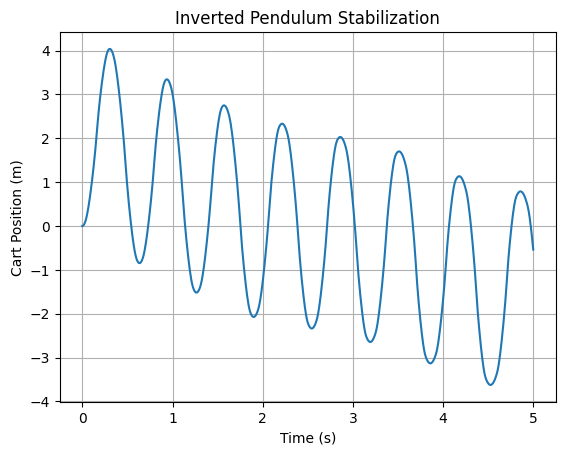

In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def inverted_pendulum_controller(Kp, Ki, Kd):
    # Define the plant dynamics
    m = 0.5  # Mass of the cart (kg)
    M = 0.2  # Mass of the pendulum (kg)
    l = 0.3  # Length of the pendulum (m)
    g = 9.8  # Acceleration due to gravity (m/s^2)
    J = M * l ** 2  # Moment of inertia of the pendulum

    def dynamics(t, states):
        x, dx, theta, dtheta = states

        # Calculate the control input using PID controller
        u = Kp * theta + Kd * dtheta + Ki * np.cumsum(theta)

        # Compute the dynamics of the system
        dx_dt = dx
        ddx_dt = (m * l * dtheta ** 2 * np.sin(theta) - m * g * np.sin(theta) * np.cos(theta) + u) / \
                 (M + m * (1 - np.cos(theta) ** 2))
        dtheta_dt = dtheta
        ddtheta_dt = -((M + m) * g * np.sin(theta) + m * l * dtheta ** 2 * np.sin(theta) * np.cos(theta) - u * np.cos(theta)) / \
                     (l * (M + m * (1 - np.cos(theta) ** 2)))

        return [dx_dt, ddx_dt, dtheta_dt, ddtheta_dt]

    # Set the initial conditions
    x0 = 0.0  # Initial position of the cart (m)
    dx0 = 0.0  # Initial velocity of the cart (m/s)
    theta0 = np.pi + 0.1  # Initial angle of the pendulum (rad)
    dtheta0 = 0.0  # Initial angular velocity of the pendulum (rad/s)
    initial_conditions = [x0, dx0, theta0, dtheta0]

    # Set the time span
    t_start = 0.0  # Start time (s)
    t_end = 5.0  # End time (s)
    t_span = (t_start, t_end)

    # Solve the differential equations
    sol = solve_ivp(dynamics, t_span, initial_conditions, method='RK45', dense_output=True)

    # Evaluate the solution
    t = np.linspace(t_start, t_end, 1000)
    y = sol.sol(t)

    return t, y[0]

# Set the PID controller gains
Kp = 10.0
Ki = 2.0
Kd = 0.1

# Run the simulation with the inverted pendulum controller
t, y = inverted_pendulum_controller(Kp, Ki, Kd)

# Plot the response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Cart Position (m)')
plt.title('Inverted Pendulum Stabilization')
plt.grid(True)
plt.show()



To derive a specialization of the controller developed for a quadrotor for the problem of stabilizing an inverted pendulum on a cart, we need to adapt the control principles to the dynamics of the inverted pendulum system. This involves understanding the underlying theory and designing a control strategy that can effectively stabilize the pendulum in an upright position.

**System Dynamics:**
The inverted pendulum on a cart is a classic control problem characterized by a pendulum attached to a cart. The dynamics of the system are governed by the principles of physics, including Newton's laws of motion and rotational dynamics. The goal is to control the position of the cart such that the pendulum remains balanced.

**Control Objective:**
The control objective is to stabilize the inverted pendulum in an upright position. This means ensuring that the pendulum does not fall over and maintains a vertical orientation. The control strategy needs to generate appropriate control inputs to counteract the destabilizing forces and disturbances acting on the pendulum-cart system.

**Proportional-Integral-Derivative (PID) Control:**
The PID controller is a popular control technique used to regulate system behavior. It combines three components: the proportional (P) term, the integral (I) term, and the derivative (D) term. Each term contributes to the control signal based on different aspects of the system's behavior.

**Proportional (P) Term:** The proportional term generates a control signal that is proportional to the error between the desired setpoint and the current system state. In the case of the inverted pendulum, the error is typically the angular displacement of the pendulum from the vertical position. The proportional term provides an immediate response to the error, applying a force to counteract the deviation.

**Integral (I) Term:** The integral term addresses steady-state errors and biases in the system. It integrates the accumulated error over time and applies a control signal proportional to this integral. In the context of the inverted pendulum, the integral term helps eliminate steady-state errors that could prevent the pendulum from maintaining an upright position. It corrects for any systematic biases in the system.

**Derivative (D) Term:** The derivative term considers the rate of change of the system's state. It provides a control signal proportional to the rate of change of the error. In the case of the inverted pendulum, the derivative term helps dampen the system's response by applying a force proportional to the angular velocity of the pendulum. This helps reduce overshoot and stabilize the pendulum more quickly.

**Controller Design for Inverted Pendulum:**
To derive a specialization of the quadrotor controller for the inverted pendulum problem, we need to adapt the control principles to the dynamics of the pendulum-cart system. This involves designing a control strategy that utilizes the proportional, integral, and derivative terms effectively.

**Proportional Control:** The proportional term in the PID controller can be used to generate a control force proportional to the angular displacement of the pendulum from the desired upright position. The gain of the proportional term determines the strength of the corrective action.

**Integral Control:** The integral term helps eliminate steady-state errors and biases in the system. It integrates the error over time and generates a control force proportional to the integral. In the context of the inverted pendulum, the integral term can correct for any constant biases in the system and ensure the pendulum maintains an upright position.

**Derivative Control:** The derivative term considers the rate of change of the error and provides a control force proportional to this rate of change. In the case of the inverted pendulum, the derivative term can dampen the system's response by applying a force proportional to the angular velocity of the pendulum. This helps reduce overshoot and stabilize the pendulum more quickly.

The gains of each term (Kp, Ki, Kd) in the PID controller need to be carefully tuned to achieve the desired response characteristics. The tuning process involves experimentation and optimization techniques to find the optimal gains that provide stability, fast response, and minimal overshoot.

**Feedback Control Loop:**
To implement the PID control strategy for the inverted pendulum, a feedback control loop is utilized. The control loop consists of measuring the current state of the system (e.g., the pendulum's angular displacement), calculating the error by comparing it to the desired setpoint, and generating the control signal based on the proportional, integral, and derivative terms. The control signal is then applied to the system, and the process repeats continuously, allowing the controller to adjust the control inputs as needed to maintain the pendulum's upright position.